In [2]:
import pandas as pd
df=pd.read_csv("nodes-addresses.csv",index_col=False, dtype='unicode')

In [9]:
df["countries"]
 

,_id,node_id,address,name,countries,country_codes,sourceID,valid_until,note
0,340,24000001,"ANNEX FREDERICK & SHIRLEY STS, P.O. BOX N-4805...",NaN,Bahamas,BHS,Bahamas Leaks,The Bahamas Leaks data is current through earl...,NaN
1,399,24000002,"SUITE E-2,UNION COURT BUILDING, P.O. BOX N-818...",NaN,Bahamas,BHS,Bahamas Leaks,The Bahamas Leaks data is current through earl...,NaN
2,402,24000003,"LYFORD CAY HOUSE, LYFORD CAY, P.O. BOX N-7785,...",NaN,Bahamas,BHS,Bahamas Leaks,The Bahamas Leaks data is current through earl...,NaN
3,445,24000004,"P.O. BOX N-3708 BAHAMAS FINANCIAL CENTRE, P.O....",NaN,Bahamas,BHS,Bahamas Leaks,The Bahamas Leaks data is current through earl...,NaN
4,535,24000005,"LYFORD CAY HOUSE, 3RD FLOOR, LYFORD CAY, P.O. ...",NaN,Bahamas,BHS,Bahamas Leaks,The Bahamas Leaks data is current through earl...,NaN
...,...,...,...,...,...,...,...,...,...
390990,1966744,68001690,NaN,"Manase, Samoa",Samoa,WSM,Paradise Papers - Samoa corporate registry,Samoa corporate registry data is current throu...,NaN
390991,1966745,68001691,NaN,"Vailele-uta, Faleata Sisifo, Samoa",Samoa,WSM,Paradise Papers - Samoa corporate registry,Samoa corporate registry data is current throu...,NaN
390992,1966746,68001692,NaN,"Lotopa, Falelatai & Samatau, Samoa",Samoa,WSM,Paradise Papers - Samoa corporate registry,Samoa corporate registry data is current throu...,NaN
390993,1966747,68001693,NaN,"Sogi, Vaisigano No.2, Samoa",Samoa,WSM,Paradise Papers - Samoa corporate registry,Samoa corporate registry data is current throu...,NaN


In [10]:
df[df["sourceID"]=="Offshore Leaks"].drop_duplicates(subset ="countries").shape

(173, 9)

In [4]:
df[df["countries"]=="Japan"].shape

(1479, 9)

In [5]:
df2=pd.read_csv("nodes-officers.csv",index_col=False, dtype='unicode')

In [6]:
df2[df2["name"]=="EL PORTADOR"].shape

(9325, 8)

<AxesSubplot:xlabel='countries', ylabel='count'>

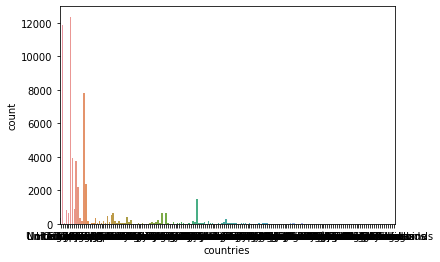

In [11]:
#EX 2
import seaborn as sns
sns.countplot(x="countries", data=df[df["sourceID"]=="Offshore Leaks"])

In [12]:
#print(df[df["sourceID"]=="Offshore Leaks"].head(10) )
#print(df['countries'].value_counts(ascending=False) )
#print(df[(df["countries"]) & (df["sourceID"]=="Offshore Leaks")].head(10))

 


In [14]:
exo2 = df[df.sourceID == 'Offshore Leaks'] #on trie deja les offshore 

exo2['countries'].value_counts().head(20) #ensuite on trie par les plus grandes valeurs
#df[df["countries"]=="Taiwan"].shape
#EX 3 MERGE



Taiwan                    12361
Hong Kong                 11894
China                      7806
Singapore                  3909
United States              3766
Indonesia                  2400
Russia                     2188
Malaysia                   1506
Cyprus                      896
United Kingdom              843
British Virgin Islands      658
Australia                   653
Thailand                    634
Canada                      624
India                       514
Japan                       467
Switzerland                 380
Not identified              356
Philippines                 355
United Arab Emirates        354
Name: countries, dtype: int64

In [32]:
df=pd.read_csv("relationships.csv",index_col=False, dtype='unicode')
df2=pd.read_csv("nodes-officers.csv",index_col=False, dtype='unicode')
df3=pd.read_csv("nodes-entities.csv",index_col=False, dtype='unicode')
fusion = pd.merge(df2,df,how="inner",left_on = "_id",right_on ='_start')
fusion2 = pd.merge(df3,fusion,left_on = "_id",right_on ='_start')
fusion2
 
#df["countries"].merge(df2, left_on='lkey', right_on='rkey')
#exo2['countries'].merge(df2, left_on='lkey', right_on='rkey')

,_id_x,node_id_x,name_x,original_name,former_name,jurisdiction,jurisdiction_description,company_type,address,internal_id,...,valid_until_y,note_y,_start,_end,_type,link,status_y,start_date,end_date,sourceID_y


In [18]:
dfOfficers = pd.read_csv("nodes-officers.csv",index_col=False, dtype='unicode')
dfRelation = pd.read_csv("relationships.csv",index_col=False, dtype='unicode')
dfEntities = pd.read_csv("nodes-entities.csv",index_col=False, dtype='unicode')

dfRelationOfficerOf = dfRelation[dfRelation["_type"]=="officer_of"]
m = pd.merge(dfRelationOfficerOf,dfOfficers,right_on='_id',left_on='_start')
m = m.merge(dfEntities,left_on='_end',right_on='_id').groupby(by='service_provider').count()
m
#m[['name_x','service_provider']].groupby(by='service_provider').sum
 

,_start,_end,_type,link,status_x,start_date,end_date,sourceID_x,_id_x,node_id_x,...,inactivation_date,struck_off_date,dorm_date,status_y,ibcRUC,country_codes_y,countries_y,sourceID,valid_until_y,note_y
service_provider,,,,,,,,,,,,,,,,,,,,,
Appleby,240495,240495,240495,240495,169864,172361,127897,240495,240495,240495,...,0,0,0,0,232369,238183,238183,240495,240495,3
Commonwealth Trust Limited,62342,62342,62342,62342,0,62208,8841,62342,62342,62342,...,0,0,20336,62325,61656,62342,62342,62342,62342,12
Mossack Fonseca,309357,309357,309357,309357,0,290874,79522,309357,309357,309357,...,151645,168741,0,309357,226434,308289,308289,309357,309357,17
Portcullis Trustnet,226339,226339,226339,226339,0,168063,21267,226339,226339,226339,...,0,0,0,226318,225739,226339,226339,226339,226339,25
